# Initialize data and centroids

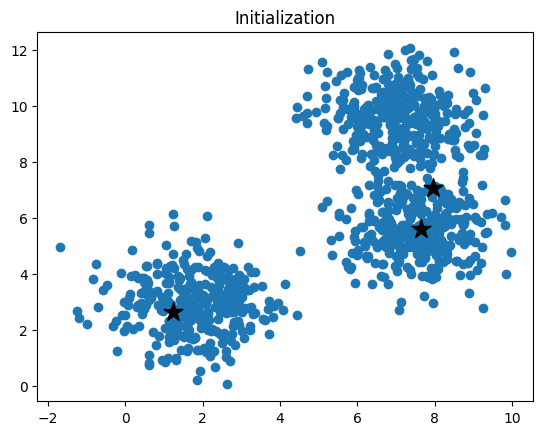

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_blobs

# Initialize the number of clusters
k = 3

# Generate some sample data
data, _ = make_blobs(1000, 2, centers=k)

# Forgy Initialize the centroids
centroids = data[np.random.choice(len(data), k, replace=False)]

# Hyper-parameter for end clustering
tolerance = 1e-6

# Show the initial points and centroids
plt.title('Initialization')
plt.scatter(data[:,0], data[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k')
max_iteration = 100

# Define the k-means function

In [6]:
# Define the k-means function
def kmeans_step(data, k, centroids):
    
    # Assign each data point to the closest centroid
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    
    # Update centroids to be the mean of the data points assigned to them
    new_centroids = np.zeros_like(centroids)
    for j in range(k):
        new_centroids[j] = np.mean(data[labels == j], axis=0)
    
    # End if centroids no longer change
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        print("End Clustering, Centroids no change.")
        # Return the original centroids and labels, and set end to True
        return centroids, labels, True
    else:
        # Return the centroids and labels, and set end to False
        return new_centroids, labels, False
    

# Run k-means
stop the process if either of the following conditions are met:

1. The centroids no longer change.
2. The maximum number of iterations is reached.

Step 0, Objective Function 2275.358494836271, Centroids 
[[7.13084768 9.15947496]
 [1.76002597 2.96243517]
 [7.494571   5.18887633]]
Step 1, Objective Function 1944.7976553054496, Centroids 
[[7.01373482 9.57479991]
 [1.76002597 2.96243517]
 [7.55486975 5.46928957]]
Step 2, Objective Function 1923.6324363853475, Centroids 
[[7.00575469 9.64222805]
 [1.76002597 2.96243517]
 [7.5466453  5.52463621]]
End Clustering, Centroids no change.


Text(0, 0.5, 'WCSS')

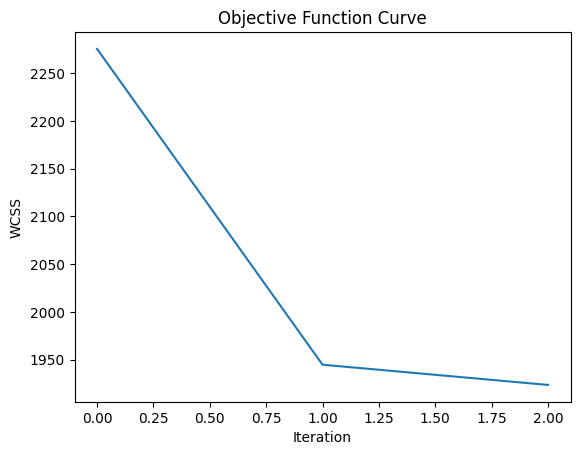

In [7]:
losses = []
for i in range(max_iteration):
    centroids, labels, end = kmeans_step(data, k, centroids)
    
    # End if centroids no longer change
    if end:
        break

    # Compute within-cluster sum of squares (WCSS) and record loss
    wcss = 0
    for j in range(k):
        cluster_data = data[labels == j]
        if len(cluster_data) > 0:
            wcss += np.sum(np.linalg.norm(cluster_data - centroids[j], axis=-1) ** 2)

    losses.append(wcss)
    print("Step {}, Objective Function {}, Centroids \n{}".format(i, wcss, centroids))

# Show the objective function curve
plt.title('Objective Function Curve')
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('WCSS')


# Show the clustering Results

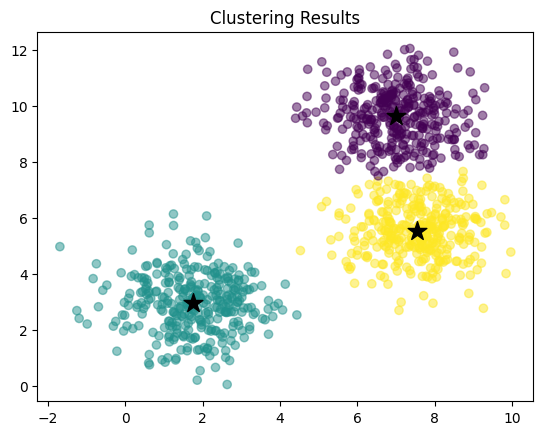

In [8]:
# Show The Clustering Results
plt.title('Clustering Results')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k')